# initial data exploration


In [4]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.ticker as ticker 
from sklearn.cluster import KMeans

In [5]:
connection = sqlalchemy.create_engine("postgresql://tcosse:mysecretpassword@db_container:5432/piscineds")

In [6]:
data = pd.read_sql_query("SELECT event_time, user_id, price, user_session from customers where event_type = 'purchase'", con=connection)

freq = data.value_counts('user_id')
print(freq.to_frame())

           count
user_id         
469299888    476
557790271    438
575709540    398
517825140    376
480463194    375
...          ...
478479575      1
478471056      1
563349793      1
581982568      1
556592300      1

[92652 rows x 1 columns]


In [7]:
inertiaTab = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=11).fit(freq.to_frame())
    inertiaTab.append(kmeans.inertia_)

## Elbow Chart

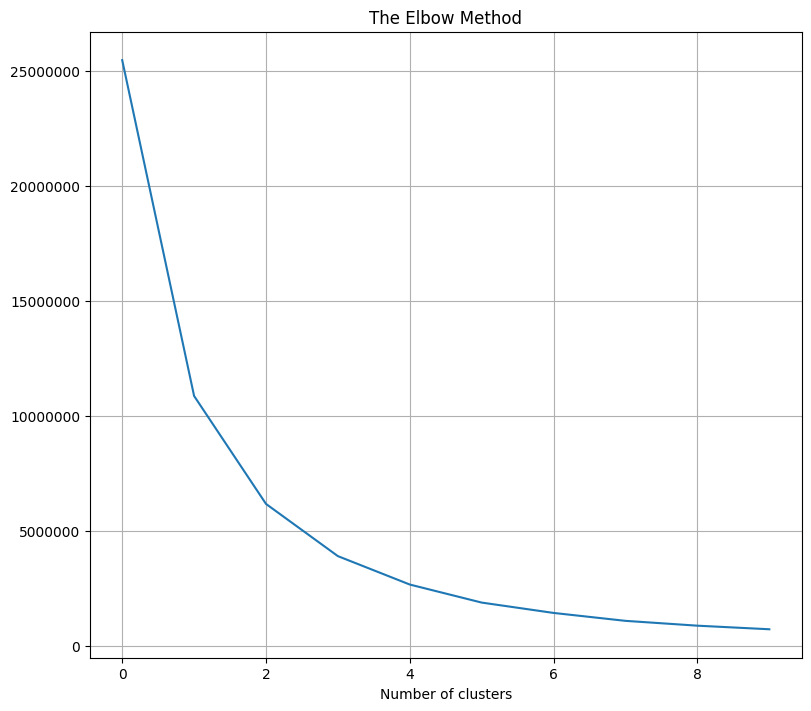

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7), layout='constrained')

ax.plot(inertiaTab)
ax.grid(True, zorder=-1)
formatter = ticker.FormatStrFormatter('%i')
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel("Number of clusters")
ax.set_title("The Elbow Method")

plt.show()